# <center>PREDICTING EARNING MANIPULATIONS BY INDIAN FIRMS</center>

## <center>IMPORTING DATA & DATA CLEANSING</center>

<span style='font-family:"Times New Roman"'><font size = 4>Installing necessary packages & libraries</font></span>

In [1]:
install.packages(c("caret", "e1071" , "ROSE" , "party" , "rpart.plot", "randomForest", "ROCR", "adabag"))
library(caret)
library(e1071)
library(ROSE)
library(party)
library(rpart.plot)
library(randomForest)
library(ROCR)
library(adabag)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loaded ROSE 0.0-3

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: rpart
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin

Loading required package: foreach
Loading required package: doParallel
Loading required package: iterators
Loading required package: par

<br><br><span style='font-family:"Times New Roman"'><font size = 4>Importing the dataset</font></span>

In [3]:
my.file <- project$get_file("Manipulations.csv")
ML <- read.csv(text = rawToChar(my.file))

In [4]:
options(scipen = 99)
sum(complete.cases(ML)) == nrow(ML)

[1] TRUE

<span style='font-family:"Times New Roman"'><font size = 4>The number of complete cases in the data set is Equal to the number of rows in the dataframe. Hence there are no missing values in the dataset</font></span><br><br>

In [5]:
str(ML)

'data.frame':	1239 obs. of  11 variables:
 $ Company.ID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DSRI         : num  1.62 1 1 1.49 1 ...
 $ GMI          : num  1.13 1.61 1.02 1 1.37 ...
 $ AQI          : num  7.185 1.005 1.241 0.466 0.637 ...
 $ SGI          : num  0.366 13.081 1.475 0.673 0.861 ...
 $ DEPI         : num  1.38 0.4 1.17 2 1.45 ...
 $ SGAI         : num  1.6241 5.1982 0.6477 0.0929 1.7415 ...
 $ ACCR         : num  -0.1668 0.0605 0.0367 0.2734 0.123 ...
 $ LEVI         : num  1.161 0.987 1.264 0.681 0.939 ...
 $ Manipulater  : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ C.MANIPULATOR: int  1 1 1 1 1 1 1 1 1 1 ...


<span style='font-family:"Times New Roman"'><font size = 4>Attribute <b>C.MANIPULATOR</b> should be a factor. Hence converting as such</font></span>

In [6]:
ML$C.MANIPULATOR <- as.factor(ML$C.MANIPULATOR)
str(ML)

'data.frame':	1239 obs. of  11 variables:
 $ Company.ID   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ DSRI         : num  1.62 1 1 1.49 1 ...
 $ GMI          : num  1.13 1.61 1.02 1 1.37 ...
 $ AQI          : num  7.185 1.005 1.241 0.466 0.637 ...
 $ SGI          : num  0.366 13.081 1.475 0.673 0.861 ...
 $ DEPI         : num  1.38 0.4 1.17 2 1.45 ...
 $ SGAI         : num  1.6241 5.1982 0.6477 0.0929 1.7415 ...
 $ ACCR         : num  -0.1668 0.0605 0.0367 0.2734 0.123 ...
 $ LEVI         : num  1.161 0.987 1.264 0.681 0.939 ...
 $ Manipulater  : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ C.MANIPULATOR: Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...


## <br><br><br><br><center>BENEISH MODEL COMAPRISON</center>

<span style='font-family:"Times New Roman"'><font size = 4>The <a href="https://en.wikipedia.org/wiki/Beneish_M-score">Beneish model</a> is a statistical model used to check if the reported earnings of the company have been manipulated.</font></span>

In [7]:
#Calculating M-score using Beneish model's formula
mscore <- -4.84 + (0.92*ML$DSRI) + (0.528*ML$GMI) + (0.404*ML$AQI) + (0.892*ML$SGI) + 
            (0.115*ML$DEPI) - (0.172*ML$SGAI) + (4.679*ML$ACCR) - (0.327*ML$LEVI)

#Predicting manipulator by setting threshold as -2.22
manip <- ifelse(mscore>-2.22,"Yes","No")
manip <- as.factor(manip)

#Confusion Matrix
ML$Manipulater <- relevel(ML$Manipulater, ref = "Yes")
manip <- relevel(manip, ref = "Yes")
a <- confusionMatrix(manip, ML$Manipulater)
a$table

          Reference
Prediction Yes  No
       Yes  39 371
       No    0 829

In [8]:
# Evaluation metrics
a$byClass

Sensitivity          Specificity       Pos Pred Value 
          1.00000000           0.69083333           0.09512195 
      Neg Pred Value            Precision               Recall 
          1.00000000           0.09512195           1.00000000 
                  F1           Prevalence       Detection Rate 
          0.17371938           0.03147700           0.03147700 
Detection Prevalence    Balanced Accuracy 
          0.33091203           0.84541667

<span style='font-family:"Times New Roman"'><font size = 4>From the above results we see that Sensitivity is 1. Thus in the existing dataset False negatives (Manipulators predicted as non-manipulators) are zero.<br><br>
    Although sensitivity is very high, <b><font color = "red">precision</font></b> of Beneish model is <b><font color = "red">very low</font></b> for the current data and hence the model can lead to a wastage of resources.<br><br>
Hence we can develop a machine learning model to increase precision</font></span><br><br><br><br>

## <center>LOGISTIC REGRESSION (Undersampling with sample of 220 cases)</center>

In [9]:
# Splitting the data set into Manipulators and non-manipulators
Yes <- ML[ML$Manipulater=="Yes",]
No <- ML[ML$Manipulater=="No",]

# Using sample to determine values randomly for setting seeds while selecting rows from Non-manipulators dataset
set.seed(123)
a <- sample(10000, 100, replace = F)
m <- matrix(NA, ncol = 9, nrow = 100)

<span style='font-family:"Times New Roman"'><font size = 4>Since data is <b>imbalanced</b> and we are performing <b>undersampling</b> the significant variables for a logistic model cannot be determined from just one sample. Hence running stepwise regression on <b>100 random subsets of data</b> to determine the most significant variables for the model</font></span>

In [ ]:
# Determining significant variables by running 100 samples
for (i in 1:100) {

# Selecting 181 random rows from Non-manipulators dataset and combining it with all 39 rows from Manipulators dataset
  set.seed(a[i])
  row <- sample(nrow(No), 220-39, replace = F)
  s <- rbind(Yes, No[row,])
  s <- s[sample(nrow(s)),]
  s <- s[,-c(1,11)]
    
# Perform undersampling to balance the dataset   
  sam <- ovun.sample(Manipulater ~ ., data = s, method = "under", N = (nrow(Yes)*2), seed = 1)$data

# Using stepwise regression method to determine significant variables for the model
  full <- glm(Manipulater~., data=sam, family = "binomial")
  null <- glm(Manipulater~1, data=sam, family = "binomial")
  b <- step(null, scope = list(lower=null, upper=full), direction = "both")
    
# Extracting the name of the signifcant variables
  c <- summary(b)
  d <- sort(rownames(c$coefficients))

# Storing the name of the variable in a matrix row
  if(length(d)!=9)
  {
    for(j in 1:(9-length(d)))
    {
      d <- c(d,NA)
    }
  }
  
  m[i,] <- d
}

### <center>I HAVE HIDDEN THE RESULTS OF THE ABOVE CELL SINCE IT SHOWS RESULTS OF 100 STEPWISE REGRESSION MODELS</center><br><br>

In [11]:
table(m)

m
(Intercept)        ACCR         AQI        DEPI        DSRI         GMI 
        100         100         100          31         100          86 
       LEVI        SGAI         SGI 
         21           7         100 

<span style='font-family:"Times New Roman"'><font size = 4>We can see that columns <font color="red"><b>DEPI</b></font>, <font color="red"><b>LEVI</b></font> & <font color="red"><b>SGAI</b></font> have appeared as significant variables in <font color="red"><b>less than 35%</b></font> of our models and hence can be neglected<br><br>
    The remaining columns can be considered as significant columns, <font color="limegreen"><b>GMI</b></font> appears in <font color="limegreen"><b>86%</b></font> of our models while <font color="limegreen"><b>ACCR</b></font>, <font color="limegreen"><b>AQI</b></font>, <font color="limegreen"><b>DSRI</b></font> & <font color="limegreen"><b>SGI</b></font> appear <font color="limegreen"><b>100%</b></font> our models.</span></font>


<br><br>

In [12]:
# Logistic regression model
model <- glm(Manipulater~ACCR+AQI+DSRI+GMI+SGI, data = s, family = "binomial")
summary(model)


Call:
glm(formula = Manipulater ~ ACCR + AQI + DSRI + GMI + SGI, family = "binomial", 
    data = s)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2826   0.2326   0.3655   0.4673   2.4031  

Coefficients:
            Estimate Std. Error z value     Pr(>|z|)    
(Intercept)   6.0832     1.0771   5.648 0.0000000163 ***
ACCR         -4.8990     1.4830  -3.303     0.000955 ***
AQI          -0.3217     0.1011  -3.182     0.001461 ** 
DSRI         -0.8530     0.2631  -3.242     0.001188 ** 
GMI          -0.6610     0.4056  -1.630     0.103148    
SGI          -1.6763     0.4891  -3.427     0.000610 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 205.58  on 219  degrees of freedom
Residual deviance: 138.23  on 214  degrees of freedom
AIC: 150.23

Number of Fisher Scoring iterations: 7


<br><br><span style='font-family:"Times New Roman"'><font size = 4><b>CUT-OFF POINT</b></font></span>

In [13]:
# Predicting across entire dataset
predict <- predict(model, newdata = ML, type="response")

In [14]:
# Creating a dataframe to stroe evaluation metric values 
model_performance <- data.frame(Cut_off=numeric(), TP=numeric(), TN=numeric(), FP=numeric(), FN=numeric(), Sensitivity=numeric(), Precision=numeric(), Specificity=numeric(), False_Alarm=numeric())
cutoff = 0.5

for(i in 1:50)
{
  pred <- ifelse(predict>cutoff,"No","Yes")
  pred <- as.factor(pred)
  pred <- relevel(pred, ref = "Yes")
  
  cm <- confusionMatrix(pred,ML$Manipulater)
  
  model_performance[i,1] <- cutoff
  model_performance[i,2] <- cm$table[1]
  model_performance[i,3] <- cm$table[4]
  model_performance[i,4] <- cm$table[3]
  model_performance[i,5] <- cm$table[2]
  model_performance[i,6] <- round(cm$byClass[1],4)
  model_performance[i,7] <- round(cm$byClass[5],4)
  model_performance[i,8] <- round(cm$byClass[2],4)
  model_performance[i,9] <- round((1 - cm$byClass[2]),4)
  
  cutoff = cutoff+0.01
}

model_performance[c(1,11,21,31,41,50), ]

,Cut_off,TP,TN,FP,FN,Sensitivity,Precision,Specificity,False_Alarm
1,0.50,13,1170,30,26,0.3333,0.3023,0.9750,0.0250
11,0.60,14,1161,39,25,0.3590,0.2642,0.9675,0.0325
21,0.70,20,1142,58,19,0.5128,0.2564,0.9517,0.0483
31,0.80,28,1094,106,11,0.7179,0.2090,0.9117,0.0883
41,0.90,38,845,355,1,0.9744,0.0967,0.7042,0.2958
50,0.99,39,27,1173,0,1.0000,0.0322,0.0225,0.9775


<span style='font-family:"Times New Roman"'><font size = 4>When the cutoff probability is 0.5 there is a higher precision but lower recall. Thus there are more number of false negatives and this may encourage manipulators to repeat the practice. As the cut-off probability increases, the precision decreases but also results in an increase in recall. <br><br>Thus there is a trade-off between recall and precision with changes in cut-off point.</span></font>


<br><br><span style='font-family:"Times New Roman"'><font size = 4><b>YOUDEN's INDEX</b> & <b>COST BASED METHOD</B></font></span>

<span style='font-family:"Times New Roman"'><font size = 4><b>Youden's Index</b> = Sensitivity + Specificity - 1</font></span>

In [15]:
model_performance$Youden_Index <- model_performance$Sensitivity + model_performance$Specificity - 1

<span style='font-family:"Times New Roman"'><font size = 4><br><br><b>Cost-Based method</b> = (p<sub>1</sub> x P<sub>10</sub>) + (p<sub>2</sub> x P<sub>01</sub>)<br>
    <b>p<sub>1</sub></b> - Penalty assigned for classifying a manipulators as non-manipulator<br>
    <b>p<sub>2</sub></b> - Penalty assigned for classifying a non-manipulators as manipulator<br>
    <b>P<sub>10</sub></b> - Proportion of manipulators classified as non-manipulators (FN/39)<br>
    <b>P<sub>01</sub></b> - Proportion of non-manipulators classified as manipulators (FP/1200)<br></font></span>

<span style='font-family:"Times New Roman"'><font size = 4>Classifying a manipulator as a non-manipulator (False Negative) has a considerably higher risk compared to classifying a non-manipulator as a manipulator (False Positive). Higher False negatives might encourage the manipulators to repeat the practice. Hence a higer penalty (0.85) needs to be assigned for False Negatives as compared to False Positives (0.15).</font></span>


In [16]:
model_performance$cost <- (0.85*model_performance$FN/39) + (0.15*model_performance$FP/1200)

<br>

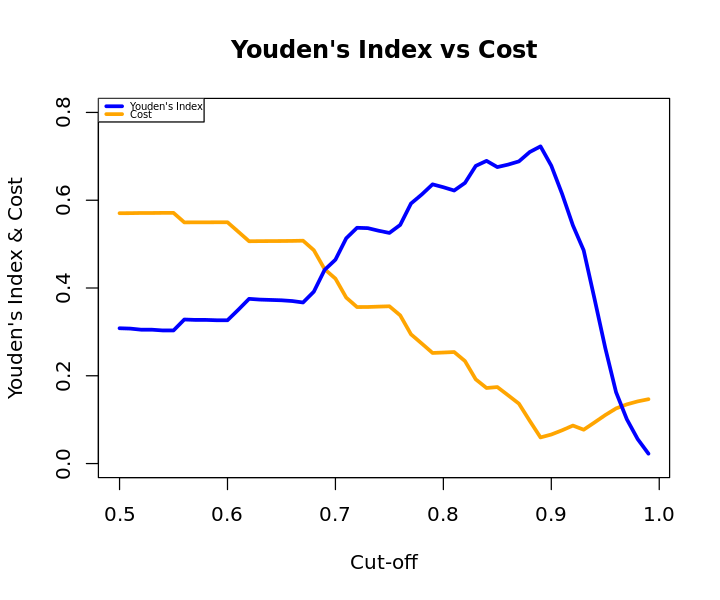

In [17]:
# Ploting Youden's Index vs Cost
options(repr.plot.width = 6, repr.plot.height = 5)
plot(model_performance$cost~model_performance$Cut_off, col="orange", lwd=3, type="l", xlim=c(0.5,0.99), ylim=c(0,0.8), xlab="Cut-off", ylab="Youden's Index & Cost", main="Youden's Index vs Cost")
lines(model_performance$Youden_Index~model_performance$Cut_off, col="blue", lwd=3)
legend("topleft", col = c("blue", "orange"), legend = c("Youden's Index","Cost"), cex=0.5, pt.cex = 0.5, lty=1, lwd = 3)

<span style='font-family:"Times New Roman"'><font size = 4>We can see that the cost is relatively high initially and decreases by larger margins once cut-off point exceeds 0.7. Youden's index increases very slowly until the cut-off point reaches 0.7 after which it increases by larger margins followed by a sudden drop.</span></font><br><br>

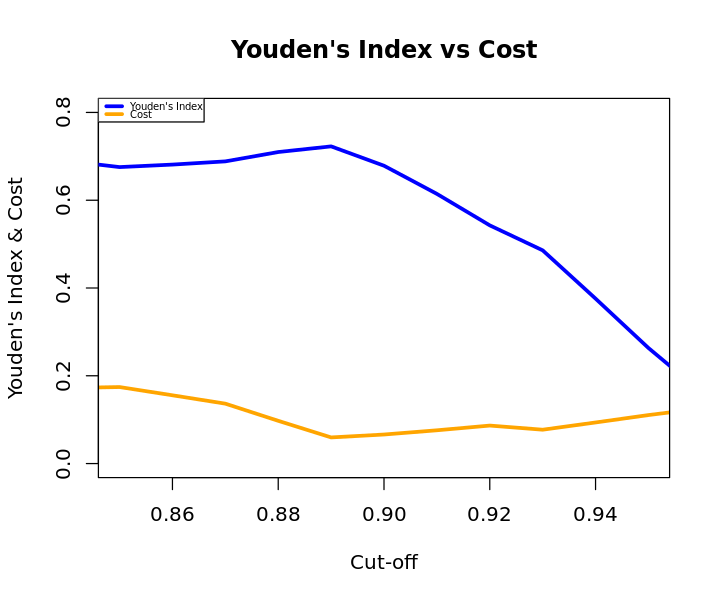

In [18]:
# Plotting values for the cut-off points between 0.85 & 0.95
options(repr.plot.width = 6, repr.plot.height = 5)
plot(model_performance$cost~model_performance$Cut_off, col="orange", lwd=3, type="l", xlim=c(0.85,0.95), ylim=c(0,0.8), xlab="Cut-off", ylab="Youden's Index & Cost", main="Youden's Index vs Cost")
lines(model_performance$Youden_Index~model_performance$Cut_off, col="blue", lwd=3)
legend("topleft", col = c("blue", "orange"), legend = c("Youden's Index","Cost"), cex=0.5, pt.cex = 0.5, lty=1, lwd = 3)

<span style='font-family:"Times New Roman"'><font size = 4>At cut-off point of 0.89 the youden's index reaches its peak value and cost is relatively low. Hence using both Youden's index & Cost-based method we can set the cut-off point as 0.89 .</span></font>

In [19]:
model_performance[model_performance$Cut_off=="0.89",]

,Cut_off,TP,TN,FP,FN,Sensitivity,Precision,Specificity,False_Alarm,Youden_Index,cost
40,0.89,38,898,302,1,0.9744,0.1118,0.7483,0.2517,0.7227,0.05954487


<span style='font-family:"Times New Roman"'><font size = 4>Sensitivity (84.62%) and Specificity (86.92%) are high when cut-off is 0.89. This logistic regression model with cut-off point as 0.89 (above which would be non-manipulator)</li></font></span><br><br>

In [20]:
#Metrics of undersampled model at optimal cut-off point
model1 <- c("Logistic Regression [Undersampled Data]", model_performance[model_performance$Cut_off=="0.89",c(1:11)])

## <br><br><br><br><center>CLASSIFICATION AND REGRESSION TREE</center>

In [21]:
#Selecting training data and performing a combination of oversampling and undersampling to handle the unbalanced data
set.seed(1234)
TrainData <- No[sample(nrow(No),181),-c(1,11)]
TrainData <- rbind(TrainData,Yes[,-c(1,11)])
TrainData <- TrainData[sample(nrow(TrainData)),]
TrainData <- ovun.sample(Manipulater ~ ., data = TrainData, method = "both", p=0.4, seed=1)$data

In [22]:
round(prop.table(table(TrainData$Manipulater))*100,2)


   No   Yes 
58.64 41.36 

<span style='font-family:"Times New Roman"'><font size = 4>The data is balanced now with 58.64% No and 41.36% Yes cases

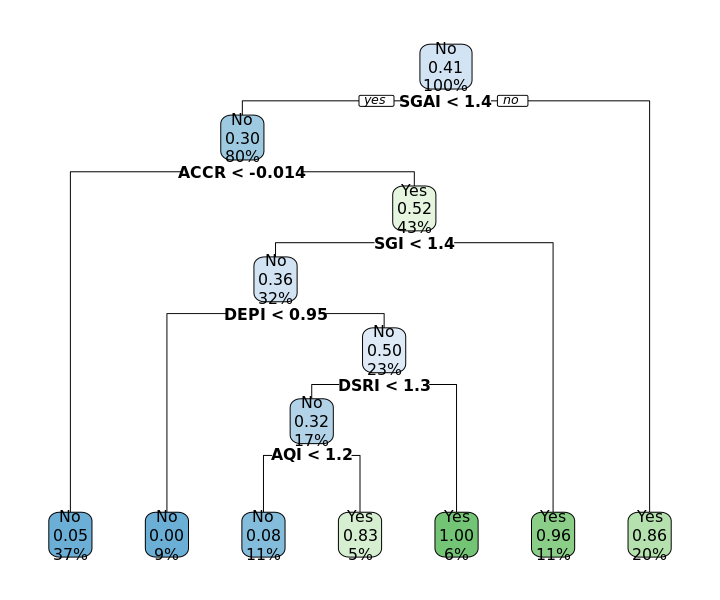

In [23]:
#Building a CART tree using the training data data
cart_tree <- rpart(Manipulater~., data=TrainData, parms = list(split="gini"), control = rpart.control(cp=0))
rpart.plot(cart_tree)

<span style='font-family:"Times New Roman"'><font size = 4><b><u>Decision Rules:</b></u><br><b>Rule 1:</b> If SGAI>=1.4 , then yes the company is a manipulator<br>Support = 20% and Confidence = 0.86<br><br><b>Rule 2:</b> If SGAI<1.4 and ACCR>=-0.014 and SGI>=1.4 , then yes the company is a manipulator<br>Support = 11% & Confidence = 0.96<br><br><b>Rule 3:</b> If SGAI<1.4 and ACCR>=-0.014 and SGI<1.4 and DEPI>=0.95 and DSRI>=1.3, then yes the company is a manipulator<br>Support = 6% & Confidence = 1<br><br>The support and confidence for class "No" is much less compared to class "Yes". But since the class of interest in the model is "Yes" we can consider this model</font></span>

In [24]:
# confusionMatrix
ctree_cm <- confusionMatrix(predict(cart_tree, newdata = ML, type = "class"),ML$Manipulater)
ctree_cm
ctree_cm$byClass

Warning message in confusionMatrix.default(predict(cart_tree, newdata = ML, type = "class"), :
“Levels are not in the same order for reference and data. Refactoring data to match.”

Confusion Matrix and Statistics

          Reference
Prediction Yes  No
       Yes  35 277
       No    4 923
                                             
               Accuracy : 0.7732             
                 95% CI : (0.7488, 0.7963)   
    No Information Rate : 0.9685             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.152              
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.89744            
            Specificity : 0.76917            
         Pos Pred Value : 0.11218            
         Neg Pred Value : 0.99569            
             Prevalence : 0.03148            
         Detection Rate : 0.02825            
   Detection Prevalence : 0.25182            
      Balanced Accuracy : 0.83330            
                                             
       'Positive

Sensitivity          Specificity       Pos Pred Value 
          0.89743590           0.76916667           0.11217949 
      Neg Pred Value            Precision               Recall 
          0.99568501           0.11217949           0.89743590 
                  F1           Prevalence       Detection Rate 
          0.19943020           0.03147700           0.02824859 
Detection Prevalence    Balanced Accuracy 
          0.25181598           0.83330128

In [25]:
#Metrics for CART Tree
model4 <- c("C&R Tree", NA, ctree_cm$table[1],ctree_cm$table[4],ctree_cm$table[3],ctree_cm$table[2], ctree_cm$byClass[1], ctree_cm$byClass[5], ctree_cm$byClass[2], (1 - ctree_cm$byClass[2]), (ctree_cm$byClass[1]+ctree_cm$byClass[2]-1), ((0.85*ctree_cm$table[2]/39)+(0.15*ctree_cm$table[3]/1200)))

## <br><br><br><br><center>LOGISTIC REGRESSION (COMPLETE DATA SET)</center>

In [26]:
# Stepwise method for variabe selecction 
full <- glm(Manipulater~., data=ML[,-c(1,11)], family = "binomial")
null <- glm(Manipulater~1, data=ML, family = "binomial")
step(null, scope = list(lower=null, upper=full), direction = "both")

Start:  AIC=348.52
Manipulater ~ 1

       Df Deviance    AIC
+ DSRI  1   312.11 316.11
+ SGAI  1   327.85 331.85
+ ACCR  1   327.95 331.95
+ SGI   1   331.97 335.97
+ AQI   1   335.27 339.27
+ LEVI  1   338.49 342.49
+ GMI   1   339.63 343.63
+ DEPI  1   343.81 347.81
<none>      346.52 348.52

Step:  AIC=316.11
Manipulater ~ DSRI

       Df Deviance    AIC
+ SGI   1   290.21 296.21
+ ACCR  1   290.87 296.87
+ AQI   1   298.72 304.72
+ GMI   1   303.39 309.39
+ SGAI  1   308.76 314.76
<none>      312.11 316.11
+ LEVI  1   310.24 316.24
+ DEPI  1   310.42 316.42
- DSRI  1   346.52 348.52

Step:  AIC=296.21
Manipulater ~ DSRI + SGI

       Df Deviance    AIC
+ ACCR  1   270.37 278.37
+ AQI   1   275.17 283.17
+ GMI   1   279.21 287.21
<none>      290.21 296.21
+ SGAI  1   288.57 296.57
+ DEPI  1   289.63 297.63
+ LEVI  1   289.64 297.64
- SGI   1   312.11 316.11
- DSRI  1   331.97 335.97

Step:  AIC=278.37
Manipulater ~ DSRI + SGI + ACCR

       Df Deviance    AIC
+ AQI   1   250.88 260


Call:  glm(formula = Manipulater ~ DSRI + SGI + ACCR + AQI + GMI + SGAI, 
    family = "binomial", data = ML)

Coefficients:
(Intercept)         DSRI          SGI         ACCR          AQI          GMI  
     6.9583      -0.6672      -0.8874      -6.3230      -0.2806      -0.4998  
       SGAI  
    -0.3977  

Degrees of Freedom: 1238 Total (i.e. Null);  1232 Residual
Null Deviance:	    346.5 
Residual Deviance: 237.1 	AIC: 251.1

In [27]:
full_model <- glm(formula = Manipulater ~ DSRI + SGI + ACCR + AQI + GMI + SGAI, family = "binomial", data = ML)

In [28]:
# Predictions with cut-off pint at 0.5
pred <- ifelse(full_model$fitted.values>0.5, "No", "Yes")
pred <- as.factor(pred)
pred <- relevel(pred,ref = "Yes")
a <- confusionMatrix(pred, ML$Manipulater)

In [29]:
# Metrics of new model with cut-off point at 0.5
model2 <- c("Logistic Regression [Full Dataset]", 0.5, a$table[1],a$table[4],a$table[3],a$table[2], a$byClass[1], a$byClass[5], a$byClass[2], (1 - a$byClass[2]), (a$byClass[1]+a$byClass[2]-1), ((0.85*a$table[2]/39)+(0.15*a$table[3]/1200)))

<br><br><span style='font-family:"Times New Roman"'><font size = 4><b>OPTIMAL CUT-OFF POINT</b>

In [30]:
model_performance <- data.frame(Cut_off=numeric(), Youden_Index=numeric(), Cost=numeric())
cutoff = 0.5

for(i in 1:50)
{
  # Precition based on cutoff value  
  pred <- ifelse(full_model$fitted.values>cutoff,"No","Yes")
  pred <- as.factor(pred)
  pred <- relevel(pred, ref = "Yes")
  
  # Confusion Matrix  
  cm <- confusionMatrix(pred,ML$Manipulater)
  model_performance[i,1] <- cutoff
    
  #Youden's Index
  model_performance[i,2] <- (cm$byClass[1]+cm$byClass[2]-1)
    
  # Cost based method  
  model_performance[i,3] <- ((0.85*cm$table[2]/39)+(0.15*cm$table[3]/1200))
  cutoff = cutoff+0.01
}

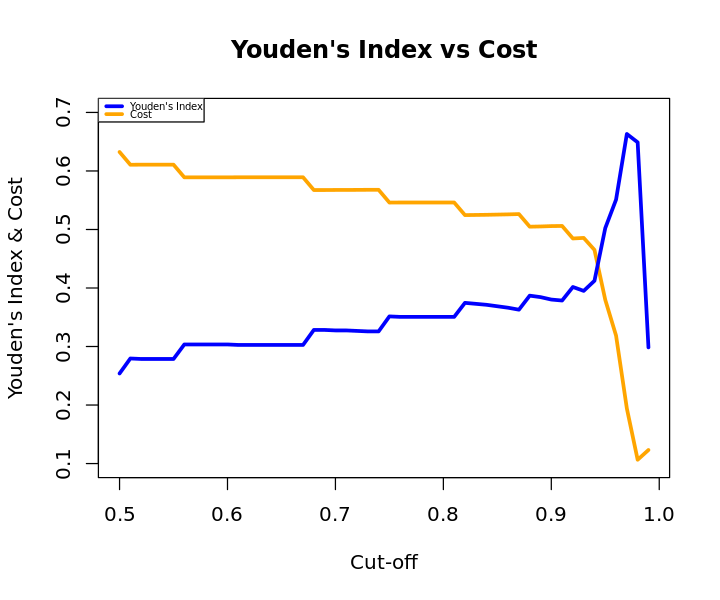

In [31]:
# Cut-off from 0.5 to 0.99
options(repr.plot.width = 6, repr.plot.height = 5)
plot(model_performance$Cost~model_performance$Cut_off, col="orange", lwd=3, type="l", xlab="Cut-off", ylab="Youden's Index & Cost", ylim=c(0.1,0.7), main="Youden's Index vs Cost")
lines(model_performance$Youden_Index~model_performance$Cut_off, col="blue", lwd=3)
legend("topleft", col = c("blue", "orange"), legend = c("Youden's Index","Cost"), cex=0.5, pt.cex = 0.5, lty=1, lwd = 3)

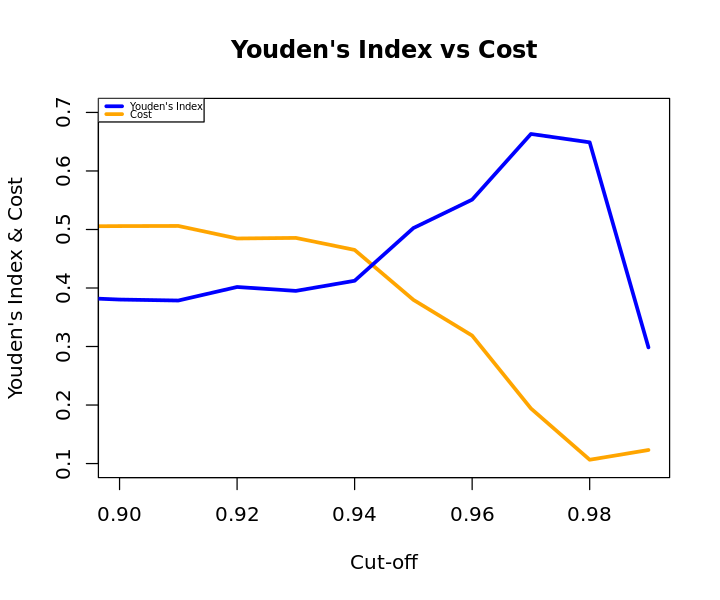

In [32]:
# Cut-off from 0.9 to 0.99
options(repr.plot.width = 6, repr.plot.height = 5)
plot(model_performance$Cost~model_performance$Cut_off, col="orange", lwd=3, type="l", xlim=c(0.9,0.99), xlab="Cut-off", ylab="Youden's Index & Cost", ylim=c(0.1,0.7), main="Youden's Index vs Cost")
lines(model_performance$Youden_Index~model_performance$Cut_off, col="blue", lwd=3)
legend("topleft", col = c("blue", "orange"), legend = c("Youden's Index","Cost"), cex=0.5, pt.cex = 0.5, lty=1, lwd = 3)

<span style='font-family:"Times New Roman"'><font size = 4>Optimal cut-off point for new model = 0.98</span></font>

In [33]:
#Predictions based on optimal cut-off point for new model
pred <- ifelse(full_model$fitted.values>0.98, "No", "Yes")
pred <- as.factor(pred)
pred <- relevel(pred,ref = "Yes")
a <- confusionMatrix(pred, ML$Manipulater)

In [34]:
model3 <- c("Logistic Regression [Full Dataset]", 0.98, a$table[1],a$table[4],a$table[3],a$table[2], a$byClass[1], a$byClass[5], a$byClass[2], (1 - cm$byClass[2]), (a$byClass[1]+a$byClass[2]-1), ((0.85*a$table[2]/39)+(0.15*a$table[3]/1200)))

## <br><br><br><br><center>RANDOM FOREST</center>

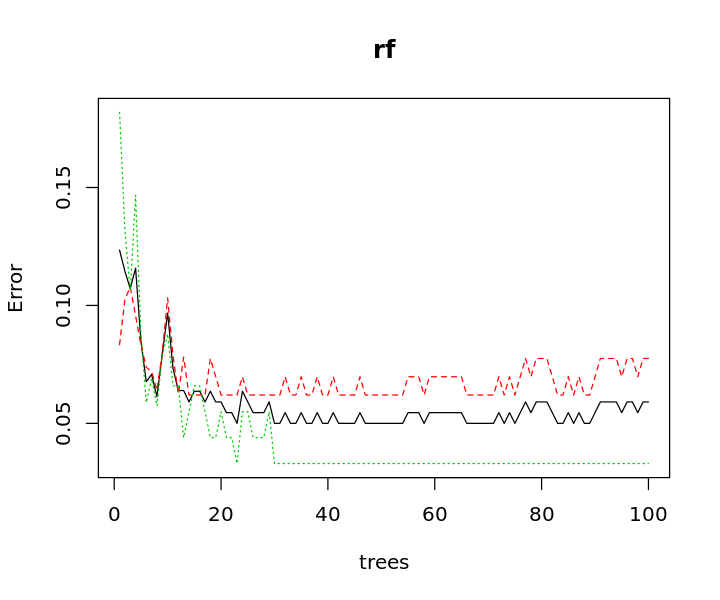

In [35]:
set.seed(1234)
rf <- randomForest(Manipulater~., data=TrainData, mtry=sqrt(ncol(TrainData)-1), ntree=100, proximity=T, importance=T)
plot(rf)

<span style='font-family:"Times New Roman"'><font size = 4>The error decreases as number of trees increases and saturates when number of trees are between 25 to 30</font></span>

In [36]:
# Prediction across entire dataset
rf_pred <- predict(rf, newdata = ML, type = "class")
rf_pred <- relevel(rf_pred, ref = "Yes")
rf_cm <- confusionMatrix(rf_pred,ML$Manipulater)
rf_cm

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes   37  122
       No     2 1078
                                             
               Accuracy : 0.8999             
                 95% CI : (0.8818, 0.9161)   
    No Information Rate : 0.9685             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.3404             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.94872            
            Specificity : 0.89833            
         Pos Pred Value : 0.23270            
         Neg Pred Value : 0.99815            
             Prevalence : 0.03148            
         Detection Rate : 0.02986            
   Detection Prevalence : 0.12833            
      Balanced Accuracy : 0.92353            
                                             
       'Po

<span style='font-family:"Times New Roman"'><font size = 4>Recall = 94.87% & Precision = 23.27</font></span>

,No,Yes,MeanDecreaseAccuracy,MeanDecreaseGini
DSRI,7.754177,10.419342,10.251412,13.447133
GMI,5.470677,8.683610,9.459573,6.943747
AQI,6.877166,9.469136,9.580083,8.058891
SGI,8.279590,13.762826,13.877702,17.679951
DEPI,5.759794,7.864869,8.841775,4.591499
SGAI,11.669110,11.951666,13.843554,19.987614
ACCR,11.600226,20.093800,19.648279,23.600213
LEVI,9.554352,10.730534,11.600336,11.781680


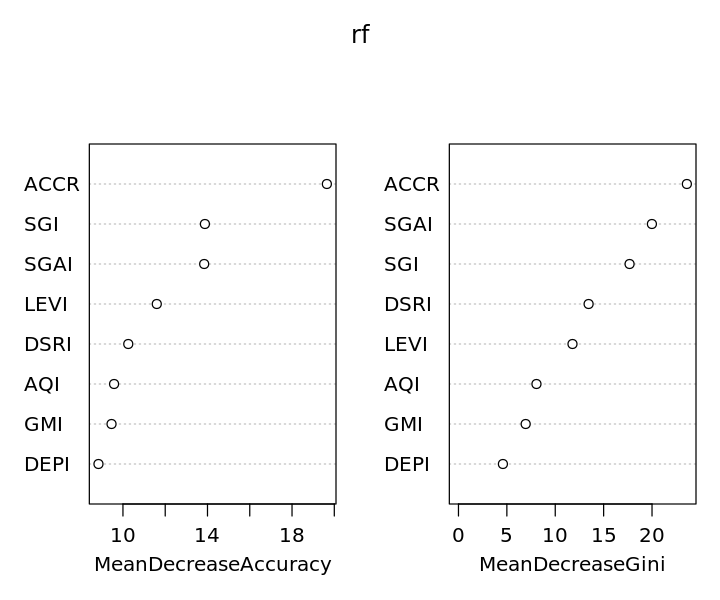

In [37]:
# Important variables
varImpPlot(rf)
importance(rf)

<span style='font-family:"Times New Roman"'><font size = 4>ACCR, SGI & SGAI seems to mbe the top 3 important variables according to Mean Decrease Gini and Accuracy</font></span>

In [38]:
# RandomForest metrics
model5 <- c("Random Forest", NA, rf_cm$table[1],rf_cm$table[4],rf_cm$table[3],rf_cm$table[2], rf_cm$byClass[1], rf_cm$byClass[5], rf_cm$byClass[2], (1 - rf_cm$byClass[2]), (rf_cm$byClass[1]+rf_cm$byClass[2]-1), ((0.85*rf_cm$table[2]/39)+(0.15*rf_cm$table[3]/1200)))

## <br><br><br><br><center>ADA BOOSTING</center>

In [39]:
set.seed(123)
adab <- boosting(Manipulater~., data = TrainData, mfinal = 10)

In [40]:
# Important variables
sort(adab$importance, decreasing = T)

ACCR      DSRI      LEVI       SGI      SGAI      DEPI       AQI       GMI 
23.124753 19.800460 18.493973 12.682379 11.160473  6.662025  4.807622  3.268314

<span style='font-family:"Times New Roman"'><font size = 4>The top 5 important variables can thus be determined as ACCR, DSRI, LEVI, SGI & SGAI</font></span>

In [41]:
# Prediction across entire dataset
pred <- predict(adab,newdata = ML)

In [42]:
# Confusion Matrix
pred$class <- relevel(as.factor(pred$class), ref = "Yes")
adab_cm <- confusionMatrix(pred$class,ML$Manipulater)
adab_cm

Confusion Matrix and Statistics

          Reference
Prediction  Yes   No
       Yes   39  115
       No     0 1085
                                             
               Accuracy : 0.9072             
                 95% CI : (0.8896, 0.9228)   
    No Information Rate : 0.9685             
    P-Value [Acc > NIR] : 1                  
                                             
                  Kappa : 0.3726             
                                             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 1.00000            
            Specificity : 0.90417            
         Pos Pred Value : 0.25325            
         Neg Pred Value : 1.00000            
             Prevalence : 0.03148            
         Detection Rate : 0.03148            
   Detection Prevalence : 0.12429            
      Balanced Accuracy : 0.95208            
                                             
       'Po

In [43]:
# AdaBoosting model metrics
model6 <- c("Adaboosting", NA, adab_cm$table[1],adab_cm$table[4],adab_cm$table[3],adab_cm$table[2], adab_cm$byClass[1], adab_cm$byClass[5], adab_cm$byClass[2], (1 - adab_cm$byClass[2]), (adab_cm$byClass[1]+adab_cm$byClass[2]-1), ((0.85*adab_cm$table[2]/39)+(0.15*adab_cm$table[3]/1200)))

## <br><br><br><br><center>MODEL COMPARISON & INFERENCES</center>

In [44]:
#Data-Frame to compare previous under-sampled model with the new model developed on the full dataset
Model_comparison <- data.frame(Model=character(), Cut_off=numeric(), TP=numeric(), TN=numeric(), FP=numeric(), FN=numeric(), Sensitivity=numeric(), Precision=numeric(), Specificity=numeric(), False_Alarm=numeric(), Youden_Index=numeric(), Cost=numeric(), stringsAsFactors=FALSE)

# Comparison of various models
for (i in 1:12) {
  Model_comparison[1,i] <- model1[i]
  Model_comparison[2,i] <- model2[i]
  Model_comparison[3,i] <- model3[i]
  Model_comparison[4,i] <- model4[i]
  Model_comparison[5,i] <- model5[i]
  Model_comparison[6,i] <- model6[i]
}

for(i in 7:12){
  Model_comparison[,c(i)] <- round(as.numeric(Model_comparison[,c(i)]),4)}

In [45]:
Model_comparison

Model,Cut_off,TP,TN,FP,FN,Sensitivity,Precision,Specificity,False_Alarm,Youden_Index,Cost
Logistic Regression [Undersampled Data],0.89,38,898,302,1,0.9744,0.1118,0.7483,0.2517,0.7227,0.0595
Logistic Regression [Full Dataset],0.5,10,1197,3,29,0.2564,0.7692,0.9975,0.0025,0.2539,0.6324
Logistic Regression [Full Dataset],0.98,36,871,329,3,0.9231,0.0986,0.7258,0.6758,0.6489,0.1065
C&R Tree,NA,35,923,277,4,0.8974,0.1122,0.7692,0.2308,0.6666,0.1218
Random Forest,NA,37,1078,122,2,0.9487,0.2327,0.8983,0.1017,0.8471,0.0588
Adaboosting,NA,39,1085,115,0,1.0000,0.2532,0.9042,0.0958,0.9042,0.0144


<p style='text-align: justify;'><span style='font-family:"Times New Roman"'><font size = 4>Companies can use ensemble method such as <b><font color = "blue">Random Forest</font></b> and <b><font color = "orange">AdaBoosting</font></b> to predict earnings manipulators. These methods have the <font color = "limegreen"><b>highest Sensitivity</b></font> among all the models. Sensitivity of Random Forest is <font color = "blue"><b>94.87%</b></font> while for AdaBoosting is <font color = "orange"><b>97.43%</b></font>. Hence these models help predict most of the manipulators correctly which covers the main use of the model.<br><br>
Although both these models have a precision of 23% approx. it is higher than most of the models. This value does indicate that a higher number of false positives (predicting Non-manipulator as manipulator) are predicted. But the impact of False positives is less compared to False Negative for this case, using this impact the models can be evaluated using Cost-Based method.<br><br>
    Both the ensemble methods have the <font color = "limegreen"><b>lowest cost</b></font> and <font color = "limegreen"><b>highest Youden's Index</b></font> which further supports the recommendation to use these methods</font></span></p>

<br><br><br><br><font size = 6>You can access the R file and dataset in an excel spreadsheet on my GitHub page <b><a href="https://github.com/Prasanna-Vengatesh-Venkataraman/Predict_Earning_Manipulations_by_Indian_Firms">here</a></b>.